# HINDCAST DATA MSC50 Numerical Model
### Data frame created by vertically stacking Gridpoint data.

### Description
Hindcast Data from the MSC50 Numerical model. Data is taken from 2 gridpoints: 
- GNO18918 : lat 48.7500 lon -126.2500, Depth 432.1110
- GN019006 : lat 49.0625, lon -126.2500, Depth   82.7388
- GN018919 : lat 48.7500 lon -125.6250, Depth 85.9252
Data is archived every 3 hour period from 1980-01 to 2015-12 https://meds-sdmm.dfo-mpo.gc.ca/isdm-gdsi/waves-vagues/MSC50-eng.html



### Methodology
EDA of hindcast data is split into three parts, general eda and exploration, linear regression and STL Decompostition. 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read in data from ASCII format for Grid point GN018918 and

file_path1 = 'GN018918.opr_dump'
with open(file_path1, 'r') as file:
    data1 = file.read()
    
print(data1[:1500])

file_path2 = 'GN019006.opr_dump'
with open(file_path2, 'r') as file: 
    data2 = file.read()
    
print(data2[:1500])

file_path3 = 'GN018919.opr_dump'
with open(file_path3, 'r') as file: 
    data2 = file.read()
    
print(data2[:1500])



 Gpt 018918, Lat 48.7500, Long 233.7500, Depth  432.1110
 OCEANWEATHER BIT-PACKED TIME SERIES - c:\temp\pacific\GN018918.opr
 Fields in this time series:
  CCYYMM      - Century, Year, Month
  DDHHmm      - Day, Hour, Minute (ut)
  WD          - Wind Direction (deg from which)
  WS          - Wind Speed (m/s)
  ETOT        - Total Variance of Total Spectrum (m^2)
  TP          - Peak Spectral Period of Total Spectrum (sec)
  VMD         - Vector Mean Direction of Total Spectrum (deg to which)
  ETTSea      - Total Variance of Primary Partition (m^2)
  TPSea       - Peak Spectral Period of Primary Partition (sec)
  VMDSea      - Vector Mean Direction of Primary Partition (deg to which)
  ETTSw       - Total Variance of Secondary Partition (m^2)
  TPSw        - Peak Spectral Period of Secondary Partition (sec)
  VMDSw       - Vector Mean Direction of Secondary Partition (deg to which)
  MO1         - First Spectral Moment of Total Spectrum (m^2/s)
  MO2         - Second Spectral Moment o

### Description of columns
Gpt 018918, Lat 48.7500, Long 233.7500, Depth  432.1110
 OCEANWEATHER BIT-PACKED TIME SERIES - c:\temp\pacific\GN018918.opr
 Fields in this time series:
 - CCYYMM      - Century, Year, Month
 - DDHHmm      - Day, Hour, Minute (ut)
 - WD          - Wind Direction (deg from which)
 - WS          - Wind Speed (m/s)
 - ETOT        - Total Variance of Total Spectrum (m^2)
 - TP          - Peak Spectral Period of Total Spectrum (sec)
 - VMD         - Vector Mean Direction of Total Spectrum (deg to which)
 - ETTSea      - Total Variance of Primary Partition (m^2)
 - TPSea       - Peak Spectral Period of Primary Partition (sec)
 - VMDSea      - Vector Mean Direction of Primary Partition (deg to which)
 - ETTSw       - Total Variance of Secondary Partition (m^2)
 - TPSw        - Peak Spectral Period of Secondary Partition (sec)
 - VMDSw       - Vector Mean Direction of Secondary Partition (deg to which)
 - MO1         - First Spectral Moment of Total Spectrum (m^2/s)
 - MO2         - Second Spectral Moment of Total Spectrum (m^2/s^2)
 - HS          - Significant Wave Height (m)
 - DMDIR       - Dominant Direction (deg to which)
 - ANGSPR      - Angular Spreading Function
 - INLINE      - In-Line Variance Ratio

In [3]:
# Define column names based on the provided headers
column_names = ["CCYYMM", "DDHHmm", "WD", "WS", "ETOT", "TP", "VMD", "ETTSea", "TPSea", "VMDSea", 
                "ETTSw", "TPSw", "VMDSw", "MO1", "MO2", "HS", "DMDIR", "ANGSPR", "INLINE"]

# Read data into a DataFrame
df1 = pd.read_csv(file_path1, skiprows=25, delim_whitespace=True, names=column_names) #skip header (first 25 rows)
df2= pd.read_csv(file_path2, skiprows=25, delim_whitespace =True, names = column_names)
df3 = pd.read_csv(file_path3, skiprows=25, delim_whitespace =True, names = column_names)

df3.head()

,CCYYMM,DDHHmm,WD,WS,ETOT,TP,VMD,ETTSea,TPSea,VMDSea,ETTSw,TPSw,VMDSw,MO1,MO2,HS,DMDIR,ANGSPR,INLINE
0,198001,10600,177.3,7.60,0.760,12.374,24.8,0.127,5.598,5.9,0.633,12.374,28.2,0.547,0.487,3.488,25.4,0.8749,0.7952
1,198001,10900,195.1,6.01,0.681,12.351,27.1,0.054,4.158,14.1,0.626,12.351,28.1,0.489,0.432,3.300,27.7,0.8791,0.8017
2,198001,11200,227.0,4.41,0.602,12.235,29.6,0.015,3.590,36.7,0.586,12.235,29.5,0.430,0.371,3.103,29.9,0.8827,0.8063
3,198001,11500,219.3,4.82,0.535,12.035,32.0,0.019,3.391,37.2,0.515,12.035,31.9,0.382,0.329,2.925,32.1,0.8834,0.8067
4,198001,11800,212.8,5.23,0.482,11.818,34.4,0.026,3.818,33.1,0.456,11.818,34.5,0.349,0.306,2.776,34.1,0.8809,0.8022


In [4]:
df1_shape = df1.shape
df2_shape = df2.shape
df3_shape = df3.shape
print('df1:',df1_shape)
print('df2:',df2_shape)
print('df3:',df3_shape)

df1: (105190, 19)
df2: (105190, 19)
df3: (105190, 19)


In [5]:
#concat dataframes vertically adding a column to specifiy gridpoint
df1['GRIDPOINT']= 'GN018918'
df2['GRIDPOINT']= 'GN019006'
df3['GRIDPOINT']= 'GN018919'
df=pd.concat([df1,df2,df3], ignore_index=True)

In [6]:
dfshape=df.shape
print('combined data frame:',dfshape)

combined data frame: (315570, 20)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315570 entries, 0 to 315569
Data columns (total 20 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   CCYYMM     315570 non-null  int64  
 1   DDHHmm     315570 non-null  int64  
 2   WD         315570 non-null  float64
 3   WS         315570 non-null  float64
 4   ETOT       315570 non-null  float64
 5   TP         315570 non-null  float64
 6   VMD        315570 non-null  float64
 7   ETTSea     315570 non-null  float64
 8   TPSea      315570 non-null  float64
 9   VMDSea     315570 non-null  float64
 10  ETTSw      315570 non-null  float64
 11  TPSw       315570 non-null  float64
 12  VMDSw      315570 non-null  float64
 13  MO1        315570 non-null  float64
 14  MO2        315570 non-null  float64
 15  HS         315570 non-null  float64
 16  DMDIR      315570 non-null  float64
 17  ANGSPR     315570 non-null  float64
 18  INLINE     315570 non-null  float64
 19  GRIDPOINT  315570 non-n

In [8]:
df.describe()

,CCYYMM,DDHHmm,WD,WS,ETOT,TP,VMD,ETTSea,TPSea,VMDSea,ETTSw,TPSw,VMDSw,MO1,MO2,HS,DMDIR,ANGSPR,INLINE
count,315570.000000,315570.000000,315570.000000,315570.000000,315570.000000,315570.000000,315570.000000,315570.000000,315570.000000,315570.000000,315570.000000,315570.000000,315570.000000,315570.000000,315570.000000,315570.000000,315570.000000,315570.000000,315570.000000
mean,199756.453636,158349.190037,219.587820,6.825372,0.418211,11.832947,77.191889,0.150317,4.482237,148.401096,0.267890,12.242069,68.646924,0.335992,0.335750,2.343565,81.291013,0.792730,0.734042
std,1038.822252,88002.208517,91.615987,3.449702,0.446477,3.060238,56.030009,0.314688,2.382950,113.527045,0.256131,2.904925,23.466357,0.315949,0.279575,1.095025,52.160194,0.107452,0.074683
min,198001.000000,10000.000000,0.000000,0.100000,0.011000,3.268000,0.000000,0.000000,0.000000,0.000000,0.001000,4.006000,0.000000,0.011000,0.017000,0.411000,0.000000,0.004700,0.500400
25%,198812.000000,81200.000000,153.000000,4.320000,0.148000,9.605000,53.100000,0.008000,3.310000,61.300000,0.106000,10.068000,56.800000,0.134000,0.147000,1.539000,58.300000,0.760900,0.685400
50%,199712.000000,160300.000000,227.300000,6.360000,0.268000,11.527000,71.000000,0.039000,4.426000,114.600000,0.184000,11.850000,69.800000,0.231000,0.246000,2.069500,76.100000,0.820100,0.742300
75%,200612.000000,231800.000000,302.100000,8.850000,0.521000,13.899000,85.900000,0.147000,6.009000,240.900000,0.339000,14.129000,80.800000,0.425000,0.431000,2.887000,90.400000,0.859800,0.789000
max,201512.000000,312100.000000,360.000000,26.400000,9.449000,24.500000,360.000000,7.987000,14.747000,400.000000,5.221000,24.500000,360.000000,5.348000,3.793000,12.296000,360.000000,0.963100,0.934500


In [9]:
#check for nulls 
df.isnull().sum()

CCYYMM       0
DDHHmm       0
WD           0
WS           0
ETOT         0
TP           0
VMD          0
ETTSea       0
TPSea        0
VMDSea       0
ETTSw        0
TPSw         0
VMDSw        0
MO1          0
MO2          0
HS           0
DMDIR        0
ANGSPR       0
INLINE       0
GRIDPOINT    0
dtype: int64

**Convert Date columns into datetime formats**
- appears that the DDHHmm column is in format; first 2 digits; day, next 2 digits; hour, next 2 digits;minutes
- CCYYMM is in the form four digit year followed by month. 

In [10]:
df['DDHHmm'].describe()

count    315570.000000
mean     158349.190037
std       88002.208517
min       10000.000000
25%       81200.000000
50%      160300.000000
75%      231800.000000
max      312100.000000
Name: DDHHmm, dtype: float64

In [11]:
def process_datetime_columns(df, CCYYMM_col, DDHHmm_col):
    # Convert 'CCYYMM' and 'DDHHmm' to datetime format and combine into one column
    df['year_month'] = pd.to_datetime(df[CCYYMM_col].astype(str), format='%Y%m')
    
    #Ensure that 'DDHHmm' has 6 characters for correct splicing
    df[DDHHmm_col] = df[DDHHmm_col].astype(str).str.zfill(6)
    
    # Extract components of day, hour, and minute, convert to string to slice, then convert back to int
    df['DDHHmm_str'] = df[DDHHmm_col].astype(str)
    df['day'] = df['DDHHmm_str'].str[:2].astype(int)
    df['hour'] = df['DDHHmm_str'].str[2:4].astype(int)
    df['minute'] = df['DDHHmm_str'].str[4:].astype(int)

    # Convert each component into timedelta to be combined with date time
    day_timedelta = pd.to_timedelta(df['day'], unit='D')
    hour_timedelta = pd.to_timedelta(df['hour'], unit='H')
    minute_timedelta = pd.to_timedelta(df['minute'], unit='m')

    # Combine into one column
    df['Datetime'] = pd.to_datetime(df['year_month']) + day_timedelta + hour_timedelta + minute_timedelta

    # Drop specified columns
    df = df.drop(['year_month', 'CCYYMM', 'DDHHmm', 'DDHHmm_str', 'day', 'hour', 'minute'], axis=1)

    return df


In [12]:
df=process_datetime_columns(df,'CCYYMM','DDHHmm')

In [22]:
df.head()

,WD,WS,ETOT,TP,VMD,ETTSea,TPSea,VMDSea,ETTSw,TPSw,VMDSw,MO1,MO2,HS,DMDIR,ANGSPR,INLINE,GRIDPOINT,Datetime
0,182.4,7.25,0.940,12.860,23.1,0.110,5.142,3.5,0.831,12.860,25.5,0.638,0.537,3.879,23.3,0.8520,0.7694,GN018918,1980-01-02 06:00:00
1,205.1,6.08,0.840,12.775,25.5,0.055,4.193,19.2,0.785,12.775,25.9,0.571,0.479,3.665,25.2,0.8549,0.7741,GN018918,1980-01-02 09:00:00
2,238.8,5.21,0.741,12.662,28.4,0.027,3.751,41.9,0.714,12.662,28.0,0.504,0.421,3.443,27.4,0.8520,0.7709,GN018918,1980-01-02 12:00:00
3,227.2,5.33,0.656,12.496,31.8,0.030,3.816,41.0,0.626,12.496,31.4,0.449,0.377,3.239,29.8,0.8432,0.7589,GN018918,1980-01-02 15:00:00
4,216.7,5.50,0.588,12.075,35.6,0.035,4.108,33.8,0.553,12.075,35.7,0.409,0.350,3.068,32.6,0.8306,0.7400,GN018918,1980-01-02 18:00:00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315570 entries, 0 to 315569
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   WD         315570 non-null  float64       
 1   WS         315570 non-null  float64       
 2   ETOT       315570 non-null  float64       
 3   TP         315570 non-null  float64       
 4   VMD        315570 non-null  float64       
 5   ETTSea     315570 non-null  float64       
 6   TPSea      315570 non-null  float64       
 7   VMDSea     315570 non-null  float64       
 8   ETTSw      315570 non-null  float64       
 9   TPSw       315570 non-null  float64       
 10  VMDSw      315570 non-null  float64       
 11  MO1        315570 non-null  float64       
 12  MO2        315570 non-null  float64       
 13  HS         315570 non-null  float64       
 14  DMDIR      315570 non-null  float64       
 15  ANGSPR     315570 non-null  float64       
 16  INLINE     315570 no

## Target Variable: wave energy
In assesing the data, it was infered that ETOT "Total variance of Total Spectrum" is reffering to Amplitude^2 which is rounghly proportional to the energy of the average existing wave at that time. 

## General EDA 

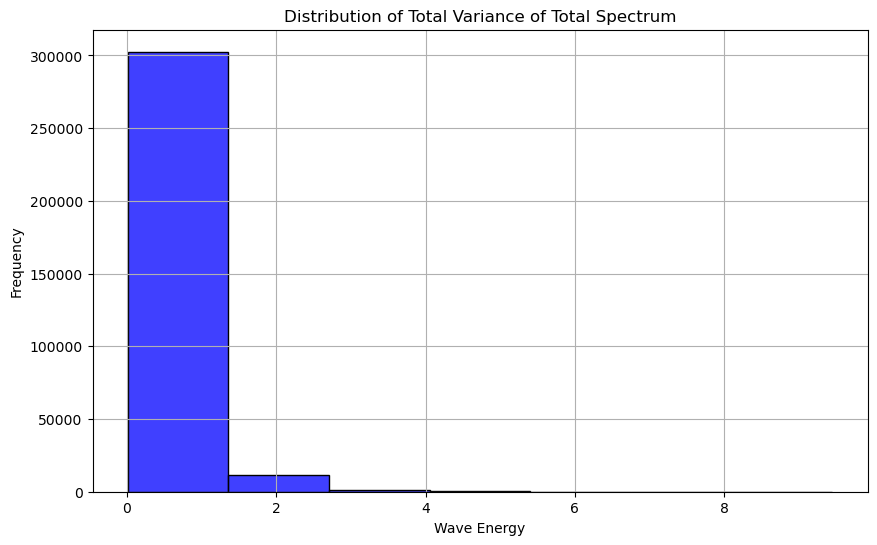

In [15]:
#plot historgram of wave energy distribution 

wave_energy =df['ETOT']
#Scotts rule for calculating bins
bin_num= int(np.ceil((wave_energy.max() - wave_energy.min()) / (3.5 * wave_energy.std())))

plt.figure(figsize=(10,6))
sns.histplot(wave_energy,color='blue',edgecolor='black',bins=bin_num)
plt.title('Distribution of Total Variance of Total Spectrum')
plt.ylabel('Frequency')
plt.xlabel('Wave Energy')
plt.grid(True)
plt.show()

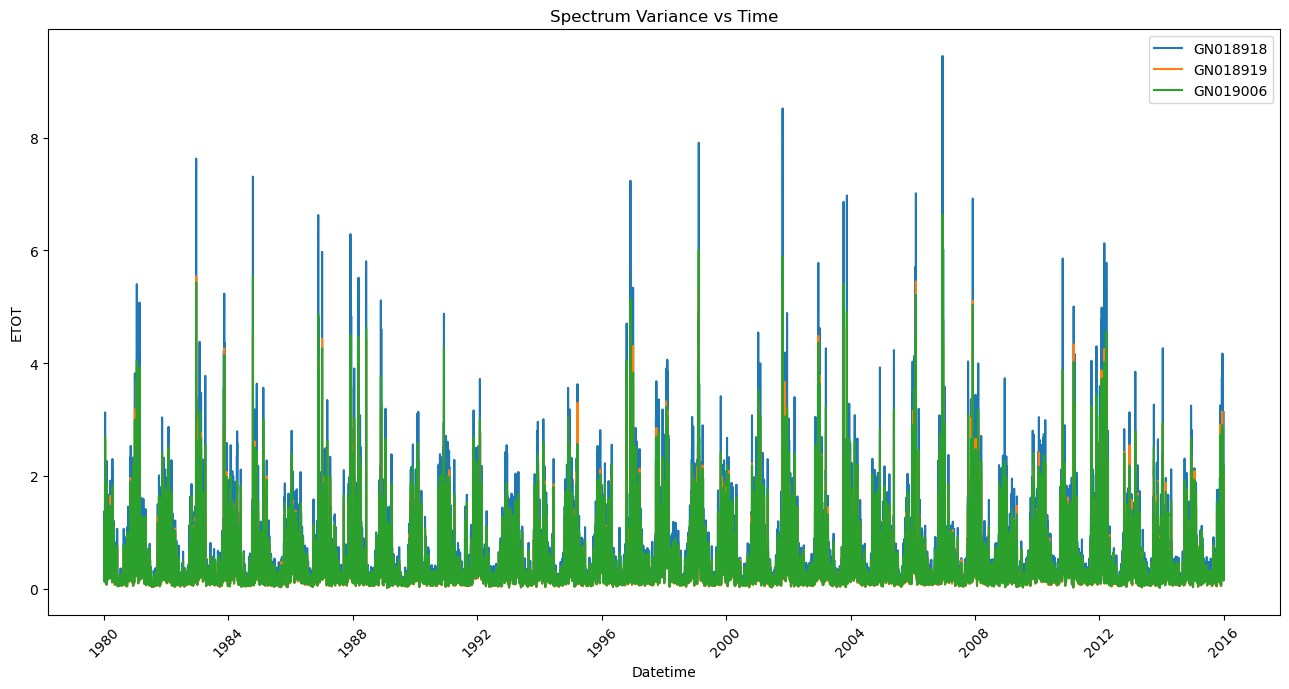

In [16]:
grouped_df = df.groupby('GRIDPOINT')

plt.figure(figsize=(13,7))

for name, group in grouped_df:
    plt.plot(group['Datetime'],group['ETOT'],label =name)
    
plt.xlabel('Datetime')
plt.ylabel('ETOT')
plt.title('Spectrum Variance vs Time')
plt.legend()
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [17]:
# Assuming you have 'grouped_df' from your grouping operation
for name, group in grouped_df:
    print(f"Group: {name}")
    print(group['Datetime'].apply(type).unique())
    print("\n")  # Add a newline for better separation between groups


Group: GN018918
[<class 'pandas._libs.tslibs.timestamps.Timestamp'>]


Group: GN018919
[<class 'pandas._libs.tslibs.timestamps.Timestamp'>]


Group: GN019006
[<class 'pandas._libs.tslibs.timestamps.Timestamp'>]




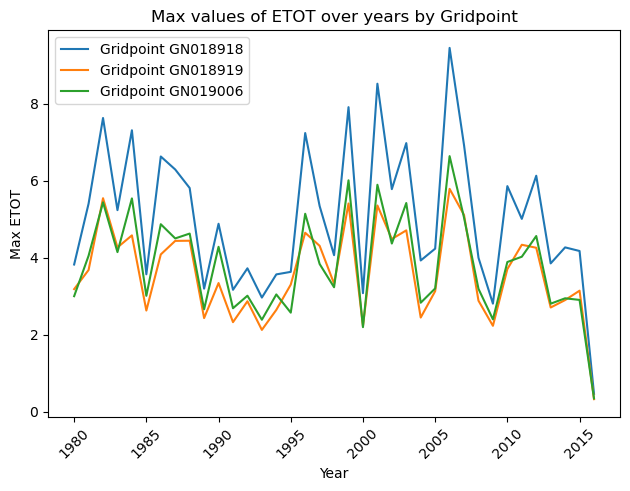

In [18]:


grouped_df =df.groupby(['GRIDPOINT',df['Datetime'].dt.year])
max_etot = grouped_df['ETOT'].max().reset_index()

for gridpoint, group_df in max_etot.groupby('GRIDPOINT'):
    plt.plot(group_df['Datetime'],group_df['ETOT'],linestyle='-',label= f'Gridpoint {gridpoint}')
    
plt.xlabel('Year')
plt.ylabel('Max ETOT')
plt.title('Max values of ETOT over years by Gridpoint')
plt.tight_layout()
plt.xticks(rotation=45)
plt.legend()
plt.show()


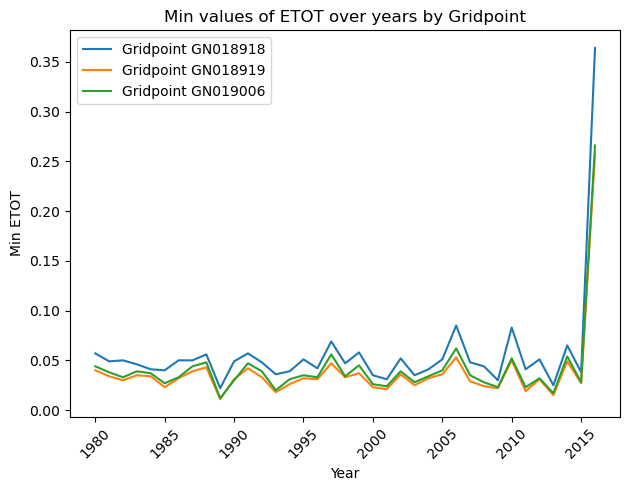

In [19]:
grouped_df =df.groupby(['GRIDPOINT',df['Datetime'].dt.year])
min_etot = grouped_df['ETOT'].min().reset_index()

for gridpoint, group_df in min_etot.groupby('GRIDPOINT'):
    plt.plot(group_df['Datetime'],group_df['ETOT'],linestyle='-',label= f'Gridpoint {gridpoint}')
    
plt.xlabel('Year')
plt.ylabel('Min ETOT')
plt.title('Min values of ETOT over years by Gridpoint')
plt.tight_layout()
plt.xticks(rotation=45)
plt.legend()
plt.show()


## Correlation between variables, each gridpoint seperately 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315570 entries, 0 to 315569
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   WD         315570 non-null  float64       
 1   WS         315570 non-null  float64       
 2   ETOT       315570 non-null  float64       
 3   TP         315570 non-null  float64       
 4   VMD        315570 non-null  float64       
 5   ETTSea     315570 non-null  float64       
 6   TPSea      315570 non-null  float64       
 7   VMDSea     315570 non-null  float64       
 8   ETTSw      315570 non-null  float64       
 9   TPSw       315570 non-null  float64       
 10  VMDSw      315570 non-null  float64       
 11  MO1        315570 non-null  float64       
 12  MO2        315570 non-null  float64       
 13  HS         315570 non-null  float64       
 14  DMDIR      315570 non-null  float64       
 15  ANGSPR     315570 non-null  float64       
 16  INLINE     315570 no

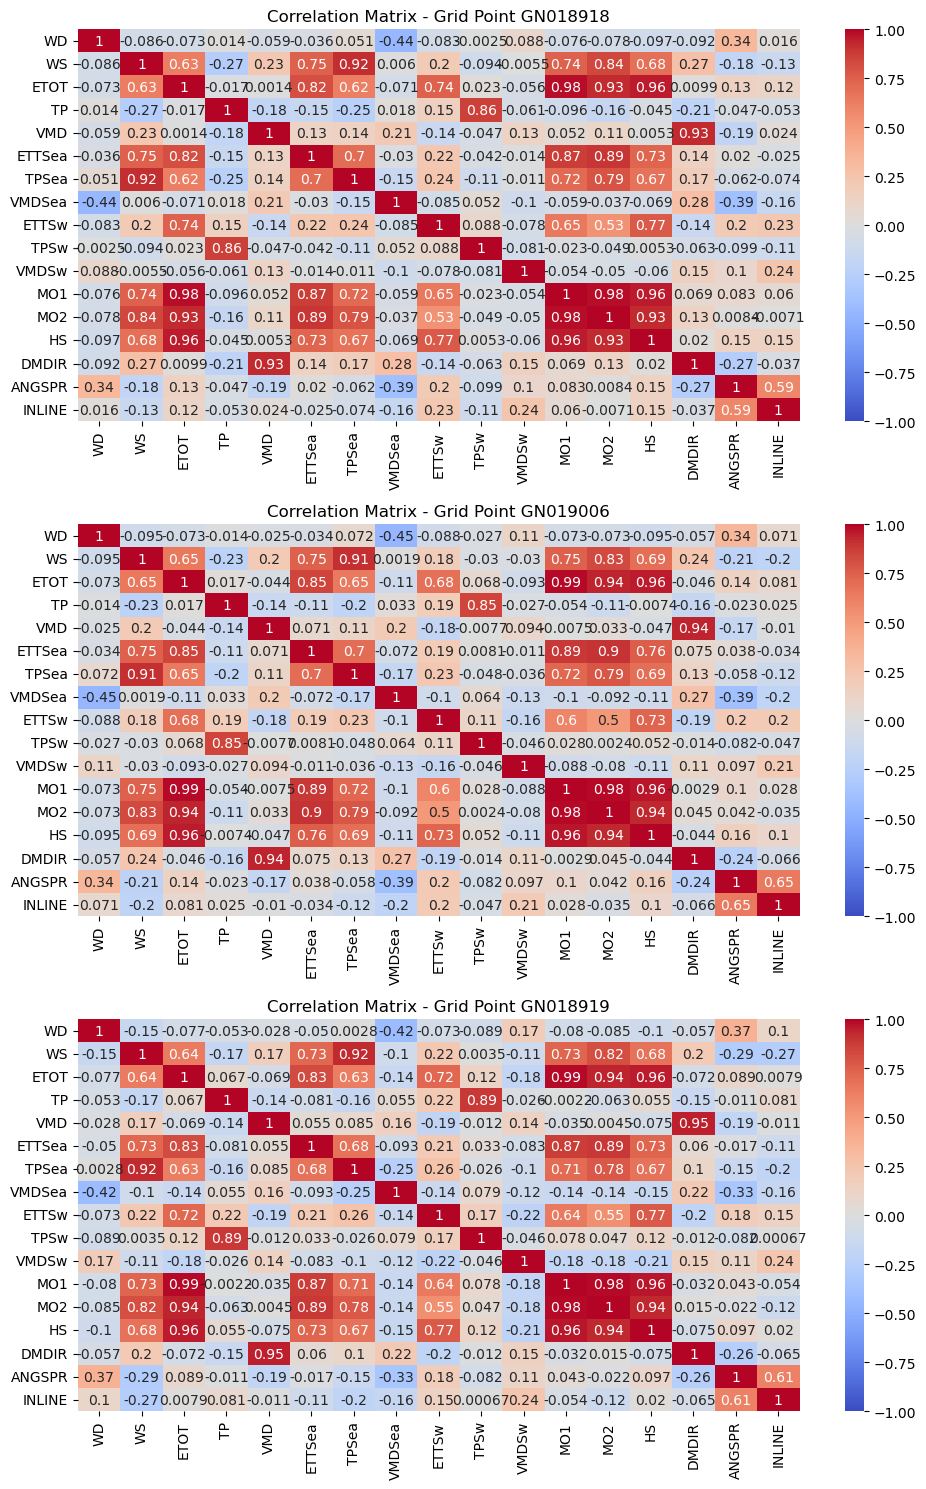

In [21]:
# Identify unique grid points
grid_points = df['GRIDPOINT'].unique()

# Set up subplots based on the number of grid points
fig, axes = plt.subplots(nrows=len(grid_points), figsize=(10, 5 * len(grid_points)))

# Iterate over grid points and create heatmaps
for i, grid_point in enumerate(grid_points):
    # Select rows corresponding to the current grid point
    grid_subset = df[df['GRIDPOINT'] == grid_point].drop(columns=['Datetime', 'GRIDPOINT'])
    
    # Calculate the correlation matrix for the subset
    corr_matrix = grid_subset.corr()
    
    # Create a heatmap for the correlation matrix
    sns.heatmap(corr_matrix, ax=axes[i], annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    
    axes[i].set_title(f'Correlation Matrix - Grid Point {grid_point}')

plt.tight_layout()
plt.show()
